<AxesSubplot:>

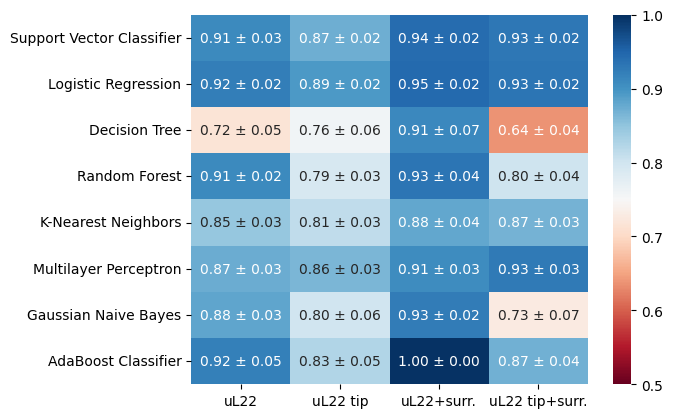

In [62]:
import numpy as np
import os
import matplotlib.pyplot as plt
import shared_data as sd
from scipy.stats import sem
import seaborn as sns
import utility_functions as uf


y_test = sd.y
results_means_array = np.zeros((len(sd.PARAMS), len(sd.SELECTION_DICT)))
results_sems_array = np.zeros((len(sd.PARAMS), len(sd.SELECTION_DICT)))
annotation_array = np.zeros(results_means_array.shape, dtype=object)

for i, model in enumerate(sd.PARAMS):

    model_name = sd.MODEL_NAMES_PLOTTING[model]

    for j, selection_name in enumerate(sd.SELECTION_DICT):

        path = f"{sd.RESULTS_DIR}/y_pred_{selection_name}_{model}.npy"

        if os.path.exists(path):
            
            y_pred = np.load(path)
            # count number of times prediction matches reality
            n_correct = np.sum(y_pred == y_test, axis=1)
            percentage_correct = n_correct / y_pred.shape[1]

            results_means_array[i][j] = np.mean(
                percentage_correct
            )
            results_sems_array[i][j] = sem(
                percentage_correct, ddof=1
            )
            annotation_array[i][j] = (f"{results_means_array[i][j]:.2f} " 
                                      f"\u00b1 {results_sems_array[i][j]:.2f}")

sns.heatmap(results_means_array, cmap="RdBu", vmin=0.5, vmax=1,
            xticklabels=sd.SELECTION_NAMES_PLOTTING.values(), 
            yticklabels=sd.MODEL_NAMES_PLOTTING.values(),
            annot=annotation_array, fmt="")
